In [3]:
import pandas as pd 

xls = pd.ExcelFile('./../data/multi_asset_etf_data.xlsx')
sheet_names = xls.sheet_names
print(sheet_names)


['descriptions', 'prices', 'total returns', 'excess returns']


In [7]:
df = pd.read_excel('./../data/multi_asset_etf_data.xlsx', sheet_name='excess returns')
df = df.set_index('Date')
df

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2011-02-28,0.006527,0.041620,-0.000527,0.035408,0.014264,-0.002174,0.045113,0.040056,0.002493,0.034647,0.007118
2011-03-31,0.008255,0.026409,0.062723,-0.024055,0.000251,-0.001719,-0.011107,0.016495,0.005348,-0.000052,0.011730
2011-04-30,0.048261,0.045015,0.026783,0.055715,0.015432,0.017868,0.046089,0.058127,0.018490,0.028418,0.023236
2011-05-31,-0.013447,-0.051625,-0.029301,-0.021962,0.001432,0.025156,0.010233,-0.041465,0.000099,-0.011115,0.002758
2011-06-30,-0.000270,-0.042817,-0.009528,-0.012280,-0.005878,-0.005217,-0.031233,-0.042754,-0.010948,-0.017042,0.007377
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,0.009647,-0.007581,0.014935,0.046020,0.011758,0.013420,0.044692,0.034457,0.008852,0.045998,0.013189
2024-06-30,-0.013674,-0.005917,0.021982,-0.022466,0.000595,0.007972,0.014565,-0.021305,-0.000965,0.031082,0.003417
2024-07-31,0.033913,-0.032580,0.003854,0.021317,0.018924,0.024373,0.071649,0.063989,0.006681,0.007510,0.012676


In [17]:
annualization_factor = 12 
import numpy as np 
def portfolio_metrics(data): 
    portfolio_data = pd.DataFrame(index = data.columns)
    mu = df.mean() * annualization_factor
    vol = df.std() * np.sqrt(annualization_factor)
    sr = mu / vol
    portfolio_data['Annualized Returns'] = mu
    portfolio_data['Annualized Vol'] = vol
    portfolio_data['Sharpe Ratio'] = sr
    portfolio_data['Rankings for Sharpe Ratio'] = portfolio_data['Sharpe Ratio'].rank(ascending = False)    
    return portfolio_data
portfolio_metrics(df)


,Annualized Returns,Annualized Vol,Sharpe Ratio,Rankings for Sharpe Ratio
BWX,-0.011888,0.081671,-0.145563,11.0
DBC,-0.009086,0.168455,-0.053935,10.0
EEM,0.026960,0.179940,0.149829,9.0
EFA,0.055037,0.152203,0.361605,5.0
HYG,0.037356,0.077289,0.483335,2.0
IEF,0.013939,0.063197,0.220561,8.0
IYR,0.077912,0.169585,0.459426,3.0
PSP,0.092851,0.215238,0.431386,4.0
QAI,0.014959,0.049007,0.305241,7.0
SPY,0.126983,0.143066,0.887578,1.0


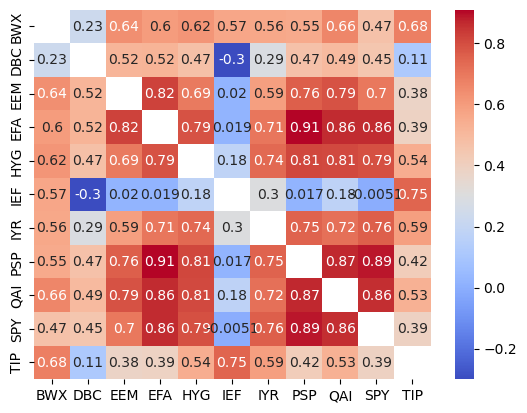

In [23]:
corr_mtx = df.corr() 
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.eye(corr_mtx.shape[0], dtype=bool)
sns.heatmap(corr_mtx, mask=mask, annot=True, cmap='coolwarm')
plt.show()

In [29]:
corr_pairs = corr_mtx.unstack()
corr_pairs = corr_pairs[corr_pairs != 1]
sorted_corr = corr_pairs.sort_values()
lowest_corr = sorted_corr.head(1)
highest_corr = sorted_corr.tail(1)

print("Lowest correlation pair:", lowest_corr)
print("Highest correlation pair:", highest_corr)

Lowest correlation pair: IEF  DBC   -0.300523
dtype: float64
Highest correlation pair: PSP  EFA    0.910596
dtype: float64


<Axes: xlabel='Date'>

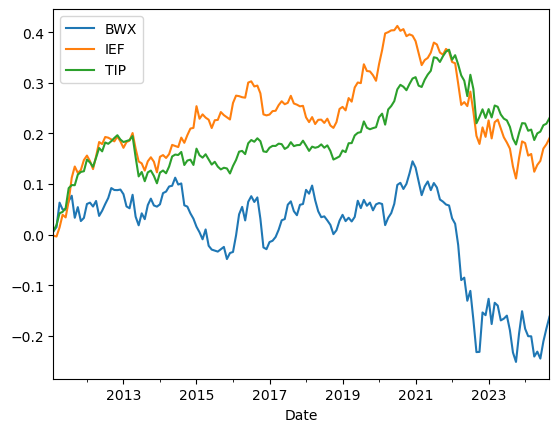

In [41]:
df[['BWX', 'IEF', 'TIP']].cumsum().plot()

<Axes: >

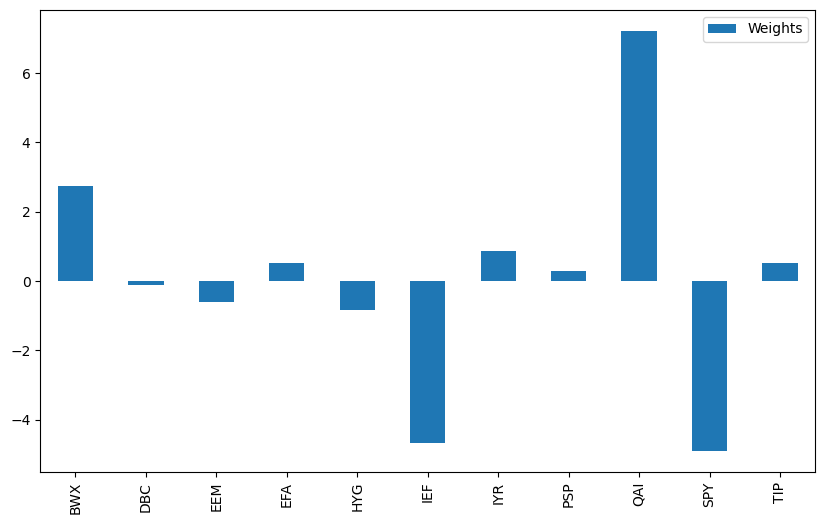

In [55]:
# Tangency portfolio 

def tangency_portfolio(data): 
    mu = data.mean()
    cov_mtx = data.cov()
    inv_cov_mtx = np.linalg.inv(cov_mtx) 
    tangency_weights = inv_cov_mtx @ mu
    tangency_weights /= np.sum(inv_cov_mtx@mu)
    return tangency_weights 
weight_df = pd.DataFrame(index = df.columns)
weights = tangency_portfolio(df)
weight_df['Weights'] = weights
weight_df.plot(kind='bar', figsize=(10, 6))


In [59]:
weight_df @ df

ValueError: matrices are not aligned